In [293]:
from random import randint
import pandas as pd
import math

In [243]:
class Album(object):
    """
        Clase que modela un Album de figuritas
    """
    def __init__(self,cantidad):
        self.cantidad = cantidad
        self.album = []
        self.repetidas = []
        
    def pegar_figurita(self,nro_figurita):
        if not nro_figurita in self.album:
            self.album.append(nro_figurita)
            return True
        else:
            return False
    
    def figuritas_pegadas(self):
        return len(self.album)
    
    def completo(self):
        return True if len(self.album) == self.cantidad else False
    

class Sobre(object):
    """
        Clase que modela un sobre de figuritas
    """
    def __init__(self, cantidad, valores):
        self._cantidad = cantidad
        self._valores = valores
        
    def distribucion_figs(self):
        return [randint(1,self._valores) for _ in range(5)]


In [244]:
class Simulacion(object):
    
    def __init__(self, amigos):
        self.albumes_amigos = [Album(NRO_FIGURITAS) for _ in range(amigos)]
    
    def albumes_completos(self):
        for a in self.albumes_amigos:
            if not a.completo():
                return False
        return True
        

In [286]:
### VARIABLES GLOBALES PARA SIMULACION

MAX_EXPERIMENTS = 10
NRO_FIGURITAS= 650
CANT_FIGURITA_SOBRE = 5
AMIGOS = 20
contadores = {e:None for e in range(MAX_EXPERIMENTS)}

In [294]:
##Loop de simulación

for e in range(MAX_EXPERIMENTS):
    
    contador_sobres = 0
    
    simulacion = Simulacion(AMIGOS)

    sobre = Sobre(CANT_FIGURITA_SOBRE,NRO_FIGURITAS)
    
    while (not simulacion.albumes_completos()):
        t = sobre.distribucion_figs()
        contador_sobres +=1
        for f in t:
            for a in simulacion.albumes_amigos:
                pude = a.pegar_figurita(f)
                if pude:
                    break
 
    contadores[e] = math.ceil(contador_sobres / AMIGOS)

### Visualizaciones de estadisticas

In [ ]:
import matplotlib.pyplot as plt
plt.show()

In [127]:
df = pd.DataFrame(contadores, index=[0]).T

In [128]:
df.columns = ['QTY']

In [129]:
df = df.T

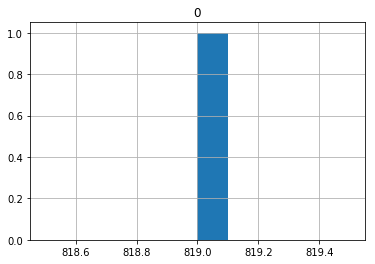

In [130]:
hist = df.hist()